Reference: https://www.kaggle.com/reynaldo/naive-xgb/comments/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime
import math
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

pd.options.display.max_columns = 300
%matplotlib inline  

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('clean_train.csv')#, parse_dates=['timestamp'])
df_test = pd.read_csv('clean_test.csv')#, parse_dates=['timestamp'])
id_test = df_test.id
df_train.sample(3)

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (348,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (350,351) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,radiation_raion,big_market_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,...,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_pe

In [3]:
y_train = df_train["price_doc"]
x_train = df_train.drop(["price_doc"], axis=1)
x_test = df_test
#can't merge train with test because the kernel run for very long time

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True)   

In [4]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': "rmse",
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

[0]	train-rmse:8.22158e+06	test-rmse:8.22711e+06
[1]	train-rmse:7.86973e+06	test-rmse:7.87848e+06
[2]	train-rmse:7.54102e+06	test-rmse:7.55679e+06
[3]	train-rmse:7.23061e+06	test-rmse:7.25337e+06
[4]	train-rmse:6.93303e+06	test-rmse:6.96054e+06
[5]	train-rmse:6.65839e+06	test-rmse:6.69213e+06
[6]	train-rmse:6.39397e+06	test-rmse:6.43437e+06
[7]	train-rmse:6.14697e+06	test-rmse:6.19552e+06
[8]	train-rmse:5.914e+06	test-rmse:5.96955e+06
[9]	train-rmse:5.6932e+06	test-rmse:5.75424e+06
[10]	train-rmse:5.48055e+06	test-rmse:5.55128e+06
[11]	train-rmse:5.2841e+06	test-rmse:5.36492e+06
[12]	train-rmse:5.09522e+06	test-rmse:5.18436e+06
[13]	train-rmse:4.92878e+06	test-rmse:5.02675e+06
[14]	train-rmse:4.7664e+06	test-rmse:4.87306e+06
[15]	train-rmse:4.61387e+06	test-rmse:4.7288e+06
[16]	train-rmse:4.46343e+06	test-rmse:4.58654e+06
[17]	train-rmse:4.32422e+06	test-rmse:4.45484e+06
[18]	train-rmse:4.19371e+06	test-rmse:4.3335e+06
[19]	train-rmse:4.07509e+06	test-rmse:4.22425e+06
[20]	train-rmse:3

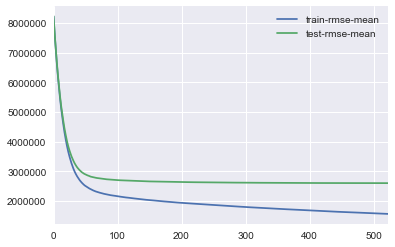

In [5]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=1, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
# [72]	train-rmsle:0.462161	test-rmsle:0.4756
# [542]	train-rmse:1.55372e+06	test-rmse:2.60703e+06

In [7]:
# cv_output[['train-rmsle-mean', 'test-rmsle-mean']].plot()

In [6]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

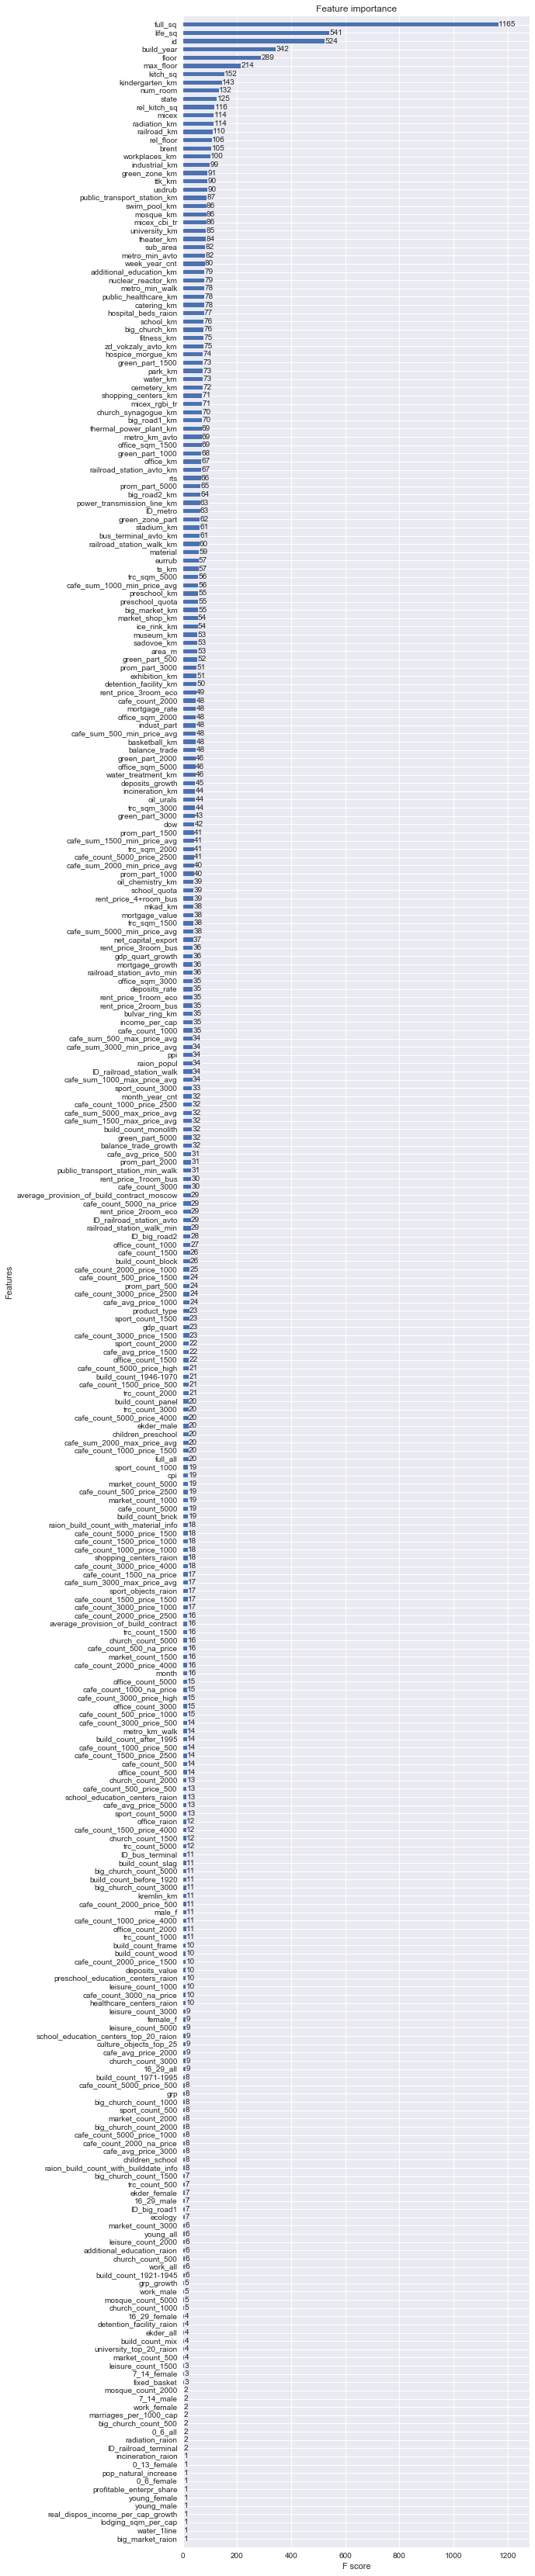

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 60))
xgb.plot_importance(model, height=0.5, ax=ax)

In [34]:
imp = model.get_fscore()
bad_imp = [i for i in imp.keys() if imp[i] < 11]
print len(bad_imp)
x_train.drop(bad_imp, axis=1, inplace=True)
x_test.drop(bad_imp, axis=1, inplace=True)

98


In [8]:
def rmsle_XGB(labels, preds):
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0, preds[i]) + 1)) ** 2.0 for i, pred in enumerate(labels)]
    return (sum(terms_to_sum) * (1.0 / len(preds))) ** 0.5

rmsle_scorer = make_scorer(rmsle_XGB, greater_is_better=False)

In [9]:
# cv_scores = cross_val_score(cv_output, x_train, y_train, scoring=rmsle_scorer, cv=5)
# print cv_scores
# print np.mean(cv_scores)

In [10]:
def rmsle_XGB(preds, dtrain):
    labels = dtrain#.get_label()
    assert len(preds) == len(labels)
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0, preds[i]) + 1)) ** 2.0 for i, pred in enumerate(labels)]
    return 'rmsle', (sum(terms_to_sum) * (1.0 / len(preds))) ** 0.5

In [11]:
y_pred = model.predict(dtrain)
print 'Train:', rmsle_XGB(y_pred, y_train)

# y_pred = model.predict(dval)
# print 'Validation:', rmsle_XGB(y_pred, y_val)

Train: ('rmsle', 0.4174086279581674)


In [13]:
y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output

,id,price_doc
0,30474,5867220.50
1,30475,7760460.50
2,30476,5944760.00
3,30477,5839955.00
4,30478,4591404.50
5,30479,9586474.00
6,30480,4469462.50
7,30481,4573331.00
8,30482,4923315.00
9,30483,4510766.00


In [14]:
output.to_csv('submissions/xgb_cleandata1_v2.csv', index=False)